<h4>Importing Libraries</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<h4>Downloading NLTK Resources</h4>

In [2]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sabalan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sabalan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sabalan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h4>Loading Dataset</h4>

In [2]:
train_dt = pd.read_csv(r'C:\\Users\Sabalan\Desktop\result\Untitled Folder\data\train_data.csv', dtype={'vote': 'str'})
title_dt = pd.read_csv(r'C:\\Users\Sabalan\Desktop\result\Untitled Folder\data\title_brand.csv')

In [3]:
train_dt.head()

overall vote  verified  reviewTime      reviewerID        asin style  \
0        2  NaN     False  2016-11-11   A2OSUEZJIN7BI  0511189877   NaN   
1        5  NaN      True  2016-06-06  A2NETQRG6JHIG7  0511189877   NaN   
2        4  NaN      True  2016-03-10  A12JHGROAX49G7  0511189877   NaN   
3        5  NaN      True  2016-01-14  A1KV65E2TMMG6F  0511189877   NaN   
4        5  NaN      True  2016-10-20  A280POPEWI0NSA  0594459451   NaN   

    reviewerName                                         reviewText  \
0          Chris  I have an older URC-WR7 remote and thought thi...   
1   Qrysta White  First time I've EVER had a remote that needed ...   
2        Linwood  Got them and only 2 of them worked. company ca...   
3  Dane Williams  I got tired of the remote being on the wrong s...   
4    Kristina H.  After purchasing cheap cords from another webs...   

                               summary  unixReviewTime  
0                         Cannot Learn      1478822400  
1  zero programming needed!  Miracle!?      1465171200  
2        Works Good and programs easy.      1457568000  
3                   Same as TWC remote      1452729600  
4                    Good Quality Cord      1476921600

<h4>P1</h4>
<h6>
  توزیع ستون overall را رسم کنید. آیا مجموعه‌داده متوازن است؟ اگر خیر، آیا نیاز است برای مدل‌سازی خود آن را متوازن کنید؟ چه راه‌حلی برای این کار پیشنهاد می‌کنید؟  
<h6p>

<Axes: >

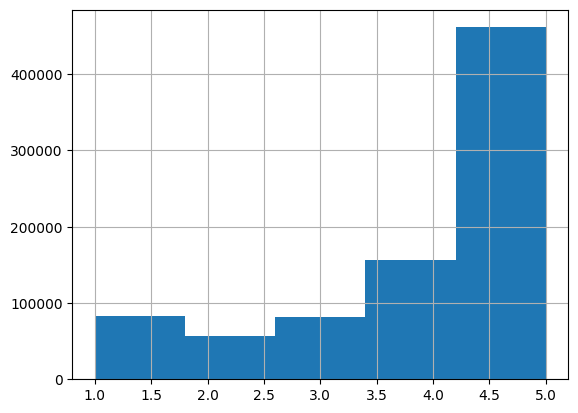

In [4]:
train_dt['overall'].hist(bins=5)

In [5]:
train_dt['overall'].value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

<h6>
   داده هارو متوازن میکنیم RandomUnderSampler()داده ها نامتوازن هستند و ما با 
</h6>

In [6]:
X = train_dt.drop('overall', axis=1)  
y = train_dt['overall']

In [7]:
undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)

<Axes: >

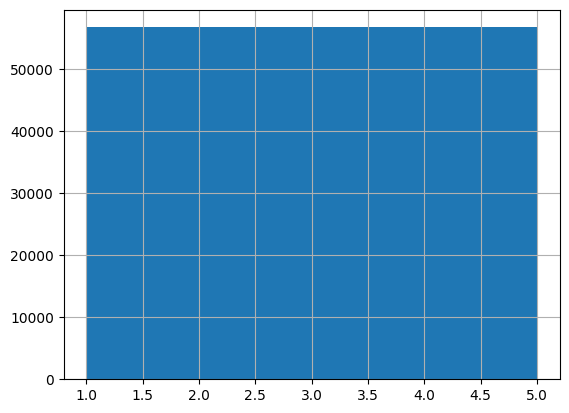

In [8]:
y_resampled.hist(bins=5)

<h4>
    P2
</h4>
<h6>
     برای سه دسته یک ابر کلمات رسم کنید 
</h6>

In [9]:
def preprocess_text(text):
    text = text.lower() 
    text = ''.join([char for char in text if char not in string.punctuation])  
    words = text.split()
    return ' '.join(words)

In [10]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

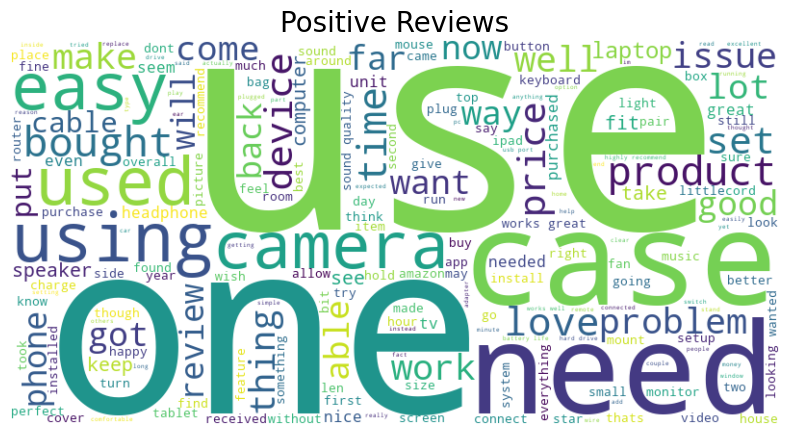

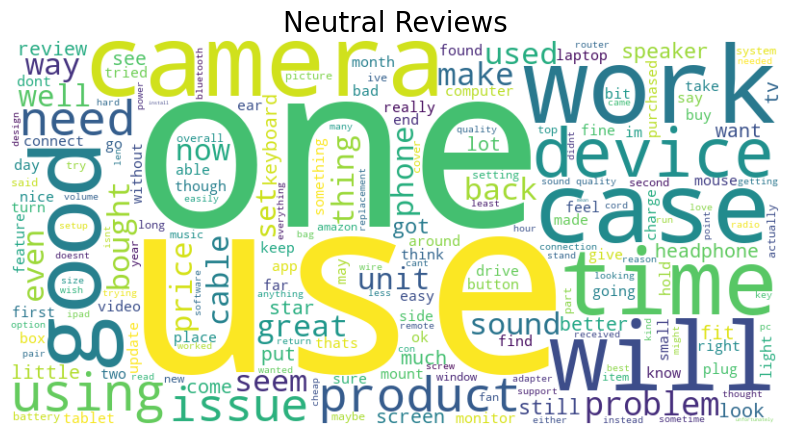

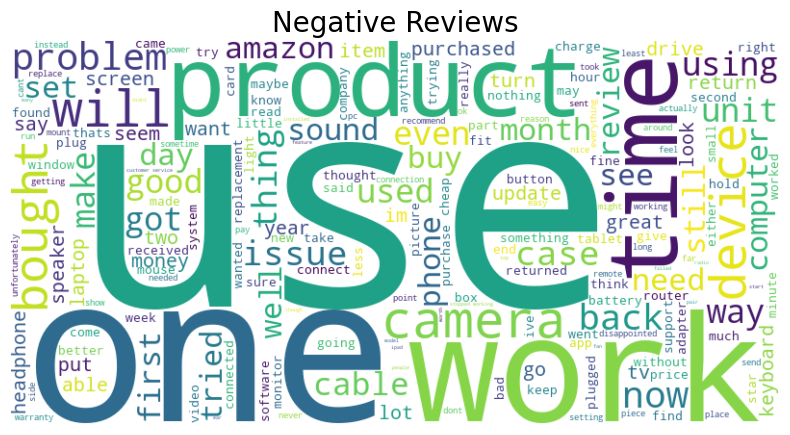

In [20]:
positive_reviews = train_dt[(train_dt['overall'] == 4) | (train_dt['overall'] == 5)]['reviewText']
neutral_reviews = train_dt[train_dt['overall'] == 3]['reviewText']
negative_reviews = train_dt[(train_dt['overall'] == 1) | (train_dt['overall'] == 2)]['reviewText']


positive_reviews = positive_reviews.apply(preprocess_text)
neutral_reviews = neutral_reviews.apply(preprocess_text)
negative_reviews = negative_reviews.apply(preprocess_text)

positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

plot_wordcloud(positive_text, 'Positive Reviews')
plot_wordcloud(neutral_text, 'Neutral Reviews')
plot_wordcloud(negative_text, 'Negative Reviews')

<h6>
  هاstopwords حذف کلمات پرتکرار و مشترک و 
</h6>

In [11]:
stopwords_att = ['use', 'device', 'camera', 'laptop', 'speaker', 'keyboard', 'computer', 'video', 'picture', 'phone', 'setting', 'card', 'system', 'radio', 'one', 'headphone']


In [72]:
stopwords_list = list(stopwords.words('english'))
stopwords_list.append(i for i in stopwords_att)
def preprocess_text_updated_list(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords_list] 
    return ' '.join(words)

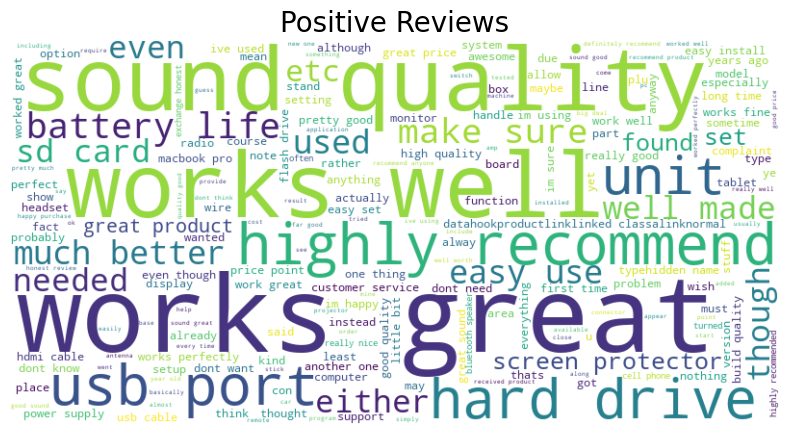

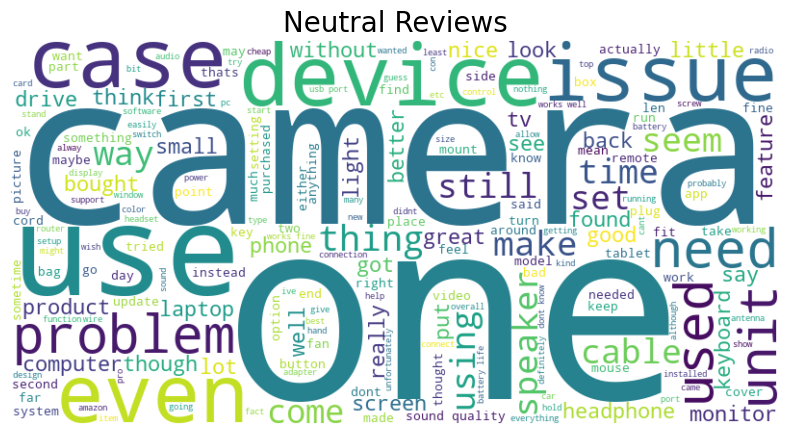

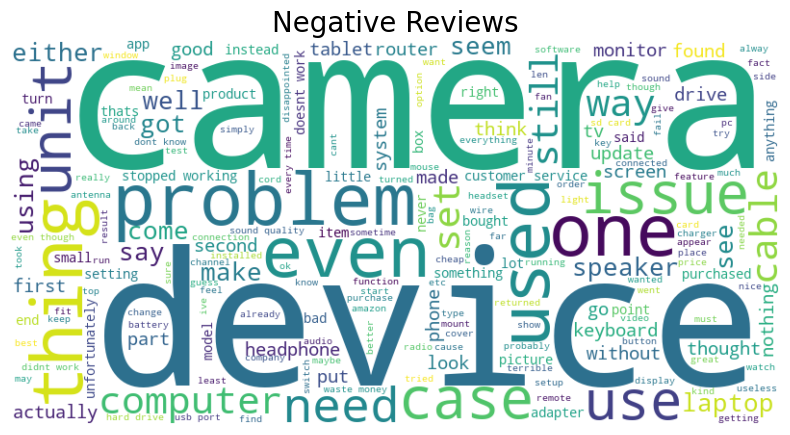

In [73]:
positive_reviews = train_dt[(train_dt['overall'] == 4) | (train_dt['overall'] == 5)]['reviewText']
neutral_reviews = train_dt[train_dt['overall'] == 3]['reviewText']
negative_reviews = train_dt[(train_dt['overall'] == 1) | (train_dt['overall'] == 2)]['reviewText']


positive_reviews = positive_reviews.apply(preprocess_text_updated_list)
neutral_reviews = neutral_reviews.apply(preprocess_text_updated_list)
negative_reviews = negative_reviews.apply(preprocess_text_updated_list)


positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

plot_wordcloud(positive_text, 'Positive Reviews')
plot_wordcloud(neutral_text, 'Neutral Reviews')
plot_wordcloud(negative_text, 'Negative Reviews')

<h6>
  نمابش صفات سه دسته
</h6>

In [12]:
def preprocess_text_adj_filter(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    adjectives = [word for word, pos in tagged if pos.startswith('JJ')] 
    return ' '.join(adjectives) 


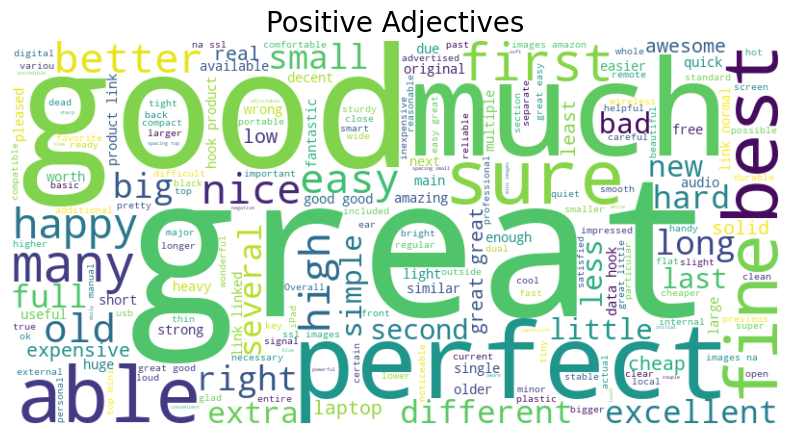

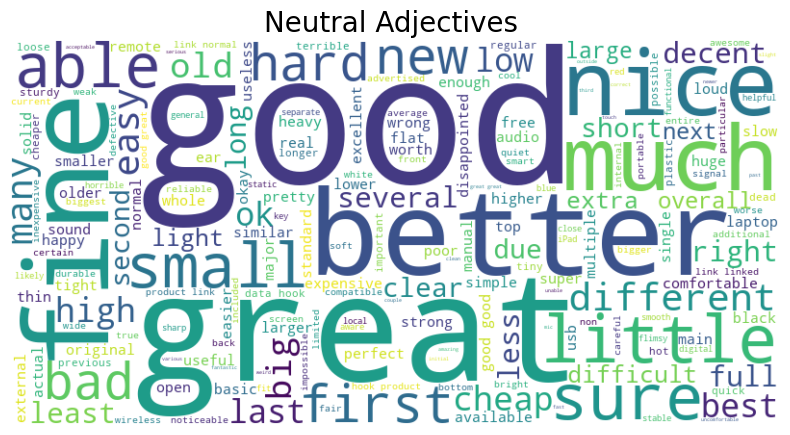

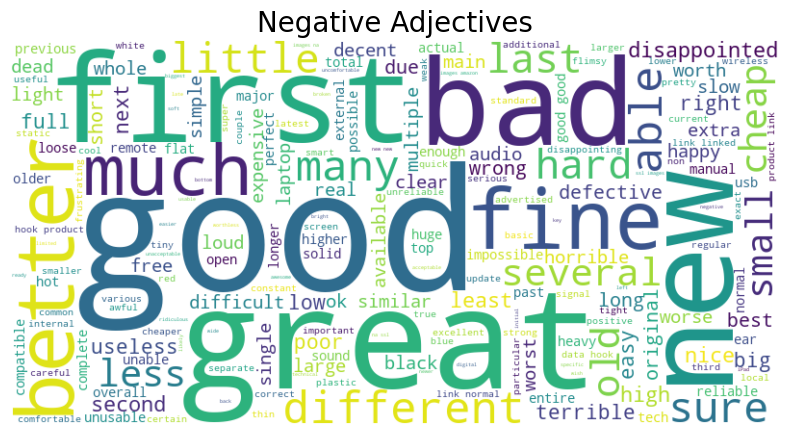

In [15]:
positive_reviews = train_dt[(train_dt['overall'] == 4) | (train_dt['overall'] == 5)]['reviewText']
neutral_reviews = train_dt[train_dt['overall'] == 3]['reviewText']
negative_reviews = train_dt[(train_dt['overall'] == 1) | (train_dt['overall'] == 2)]['reviewText']

positive_reviews = positive_reviews.apply(preprocess_text_adj_filter)
neutral_reviews = neutral_reviews.apply(preprocess_text_adj_filter)
negative_reviews = negative_reviews.apply(preprocess_text_adj_filter)

positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

plot_wordcloud(positive_text, 'Positive Adjectives')
plot_wordcloud(neutral_text, 'Neutral Adjectives ')
plot_wordcloud(negative_text, 'Negative Adjectives')

In [21]:
common_words = {"good", "great", "first", "better", "new", "small", "sure", "much", "little", "able"}
def preprocess_text_adj_filter_with_common_word(text):
    text_list = text.split(' ')
    text_list = [i for i in text_list if i not in common_words]
    return ' '.join(text_list) 


In [17]:
positive_text_list = positive_text.split(' ')

In [18]:
positive_text_list2 = [i for i in positive_reviews_list if i not in common_words]

NameError: name 'positive_reviews_list' is not defined

In [162]:
len(positive_text_list)

617999

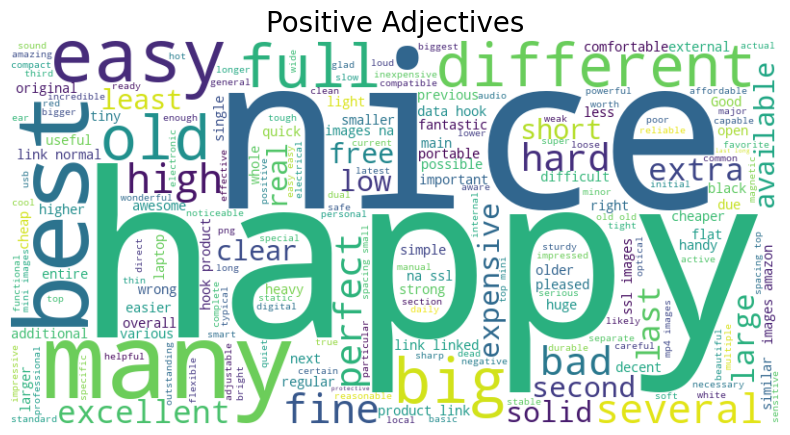

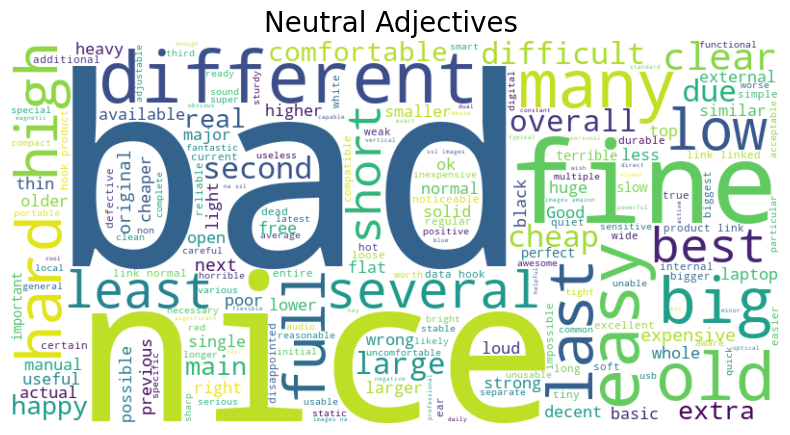

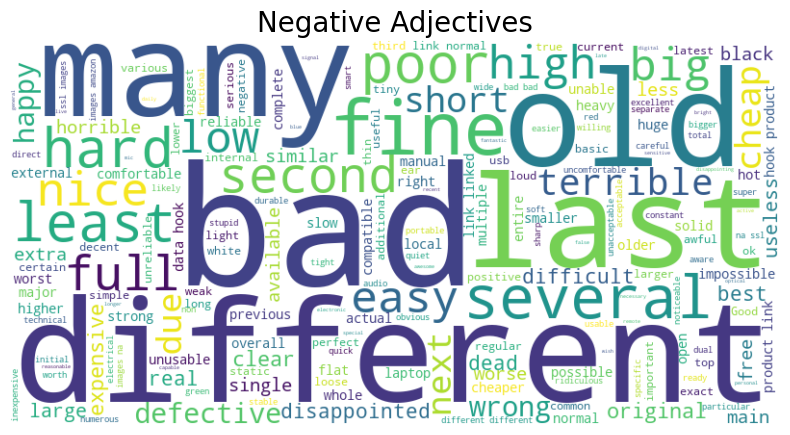

In [22]:
positive_reviews = positive_reviews.apply(preprocess_text_adj_filter_with_common_word)
neutral_reviews = neutral_reviews.apply(preprocess_text_adj_filter_with_common_word)
negative_reviews = negative_reviews.apply(preprocess_text_adj_filter_with_common_word)

positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

plot_wordcloud(positive_text, 'Positive Adjectives')
plot_wordcloud(neutral_text, 'Neutral Adjectives ')
plot_wordcloud(negative_text, 'Negative Adjectives')

<h4>
    P3
</h4>
<h6>
      ده نفری که در مجموع نظرات‌شان بیشتر مفید واقع شده 
</h6>

In [33]:
train_dt['vote_replaced'] = train_dt['vote'].str.replace(',', '')
train_dt['vote_replaced'] = train_dt['vote_replaced'].astype('float')

In [34]:
vote_cnt = train_dt.groupby(['reviewerID', 'reviewerName']).agg({'vote_replaced': 'sum'})
vote_cnt = vote_cnt.sort_values(by='vote_replaced', ascending=False)[:10]

In [35]:
vote_cnt.columns = ['total votes']

In [36]:
vote_cnt

total votes
reviewerID     reviewerName              
A25GROL6KJV3QG Benson Leung        4572.0
A3KJ0DF3LTNJ6X Voltron00x          3181.0
A2IK776FY6MEMG Obi Wan             3150.0
A1KPFZCS71QKW5 nycebo              2978.0
AMYCUX8EWEUVV  Mayra S.            2631.0
ADLVFFE4VBT8   Cthulhu             2607.0
A1GHPJB2N0D0RL Chris Upton         2167.0
AW7UMXXJKFSNS  Sally B.            1912.0
A33AN9NP6574M2 DJ                  1867.0
A2VQ0V1TWXF3U7 Mark A. Baker       1820.0

<h4>P4</h4>
<h6>هیستوگرام طول متن (تعداد کاراکتر) ستون ریویو تکست را رسم کنید. یک‌بار با حالت اصلی رسم کنید و یک‌بار به‌صورت فیلترشده (آن دسته‌هایی که تعداد نمونه‌های کم و پرتی دارند را در نظر نگیرید) ترسیم کنید.</h6>

In [110]:
def ret_len(i):
    return len(i)

In [111]:
train_dt['text_length'] = train_dt['reviewText'].apply(lambda row: ret_len(row))

In [112]:
train_dt['text_length']

0         561
1         450
2         205
3         284
4         247
         ... 
838939    276
838940    228
838941    242
838942    528
838943    432
Name: text_length, Length: 838944, dtype: int64

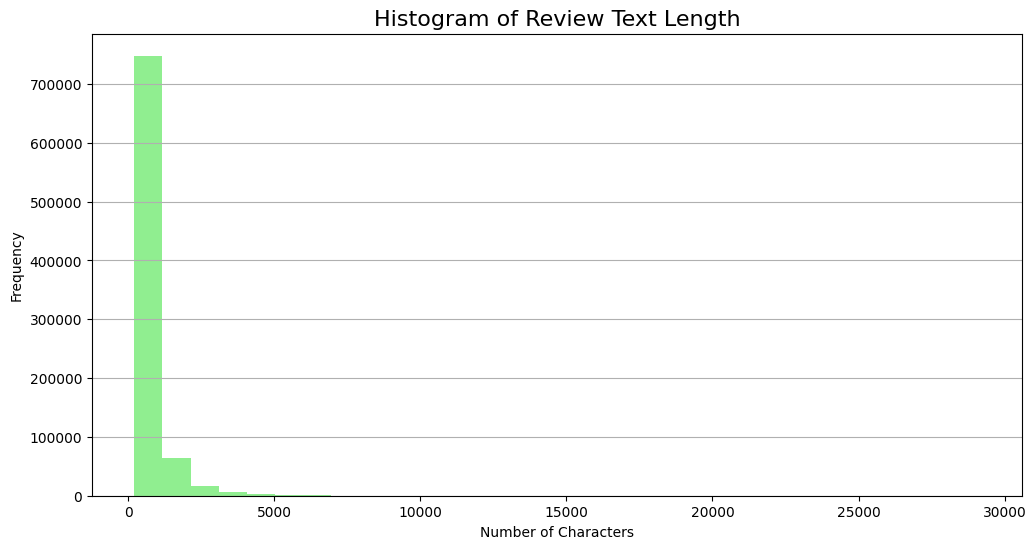

In [86]:
plt.figure(figsize=(12, 6))
plt.hist(train_dt['text_length'], bins=30, color='lightgreen')
plt.title('Histogram of Review Text Length', fontsize=16)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)
plt.show()


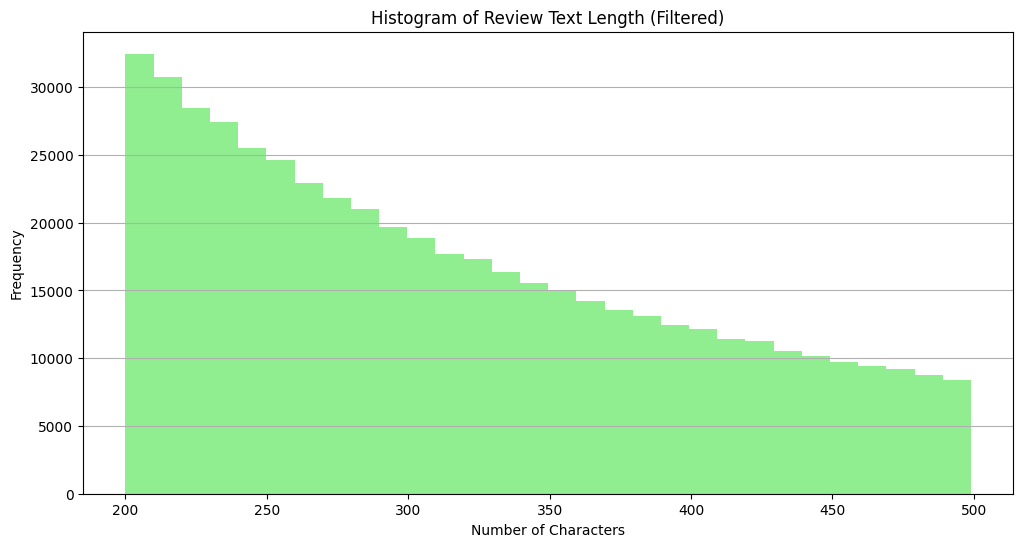

In [113]:
filtered_train_dt = train_dt[(train_dt['text_length'] > 0) & (train_dt['text_length'] < 500)]
plt.figure(figsize=(12, 6))
plt.hist(filtered_train_dt['text_length'], bins=30, color='lightgreen')
plt.title('Histogram of Review Text Length (Filtered)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)
plt.show()

<h4>P5</h4>
<h6>کدام محصولات بیشترین امتیاز ۵ را کسب کرده‌اند؟ ۱۰ مورد برتر را به‌ترتیب به‌صورت یک جدول شامل نام برند، عنوان محصول و تعداد نظرات با امتیاز ۵ نمایش دهید.
</h6>

In [122]:
overall_cnt = train_dt[train_dt['overall'] == 5].groupby(by='asin').agg({'vote': 'count'})
top10_prd = overall_cnt.sort_values(by='vote', ascending=False)[:10]
top10_prd = top10_prd.merge(title_dt, on='asin')

In [123]:
top10_prd2 = top10_prd.copy()

In [118]:
# top10_prd2.columns = ['vote', 'brand', 'title', 'asin']

In [127]:
top10_prd = pd.DataFrame()
top10_prd['asin'], top10_prd['brand'], top10_prd['title'], top10_prd['five_star_count'] = top10_prd2['asin'], top10_prd2['brand'], top10_prd2['title'], top10_prd2['vote'] 

In [128]:
top10_prd.set_index('asin')

brand  \
asin                               
B00S9SGNNS                  Asus   
B01A7G35S0                 1MORE   
B00WF78GS4                  Aiwa   
B01DA0YCNC                  Roku   
B009ZGK6QS         BAFX Products   
B01DUTOI5U               Samsung   
B003Y5RYNY               TP-LINK   
B00Y01VRSO                  eero   
B010OYASRG  Cambridge Soundworks   
B01E3SNO3E                  Bose   

                                                        title  five_star_count  
asin                                                                            
B00S9SGNNS  ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...              105  
B01A7G35S0  1MORE Triple Driver In-Ear Earphones Hi-Res He...              101  
B00WF78GS4             Aiwa Exos-9 Portable Bluetooth Speaker               99  
B01DA0YCNC  Roku Streaming Stick (3600R) - HD Streaming Pl...               97  
B009ZGK6QS  BAFX Products IR Remote Control Extender/IR Re...               95  
B01DUTOI5U  Samsung UN40KU6300 40-Inch 4K Ultra HD Smart L...               86  
B003Y5RYNY  TP-Link N450 Wi-Fi Router - Wireless Internet ...               86  
B00Y01VRSO  eero Home WiFi System (Individual) - 1st Gener...               83  
B010OYASRG  OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...               83  
B01E3SNO3E  Bose QuietComfort 35 (Series I) Wireless Headp...               81

<h4>P6</h4>
<h6>ابتدا ۱۰ برندی که بیشترین تعداد نظر را داشته‌اند پیدا کنید. سپس میانگین امتیاز هر کدام را محاسبه کرده و یک جدول شامل نام برند و میانگین امتیاز آن به‌ترتیب میانگین امتیاز نمایش دهید.
</h6>

In [93]:
train_dt_mrg = train_dt.merge(title_dt, on='asin')
brand_grp = train_dt_mrg.groupby(by='brand').agg({'asin': 'count', 'overall': 'mean'})

In [94]:
brand_grp.columns = ['count', 'overal mean']

In [95]:
brand10_dt = brand_grp.sort_values(by='count', ascending=False)[:10]
brand10_dt.drop('count', axis=1, inplace=True)

In [96]:
brand10_dt.sort_values(by='overal mean', ascending=False)

overal mean
brand                    
Anker            4.244320
AmazonBasics     4.201468
Sabrent          4.028005
SanDisk          3.958810
Logitech         3.954061
Samsung          3.941268
Sony             3.938726
TP-LINK          3.928681
Asus             3.855550
NETGEAR          3.836274

In [10]:
train_resmapled_dt = pd.concat([X_resampled, y_resampled], axis=1)

In [11]:
train_resmapled_dt['vote_replaced'] = train_resmapled_dt['vote'].str.replace(',', '')
train_resmapled_dt['vote_replaced'] = train_resmapled_dt['vote_replaced'].astype('float')

In [12]:
print(pd.crosstab(train_resmapled_dt['verified'], train_resmapled_dt['overall'], normalize='columns') * 100)
print(pd.crosstab(train_resmapled_dt['verified'], train_resmapled_dt['overall'], normalize='index') * 100)
# train_resmapled_dt

overall           1          2          3          4          5
verified                                                       
False     16.477553  14.259285  13.362464  15.152583  13.600324
True      83.522447  85.740715  86.637536  84.847417  86.399676
overall           1          2          3          4          5
verified                                                       
False     22.617781  19.572893  18.341879  20.799071  18.668376
True      19.553524  20.072845  20.282801  19.863714  20.227115


In [13]:
print(pd.crosstab(train_resmapled_dt['vote_replaced'], train_resmapled_dt['overall']) * 100)
# print(pd.crosstab(train_resmapled_dt['vote'], train_resmapled_dt['overall'], normalize='index') * 100)

overall             1       2       3       4       5
vote_replaced                                        
2.0            602700  494500  464000  438900  436200
3.0            349700  239800  245300  222200  226600
4.0            215100  142900  136600  127200  130900
5.0            146100  100000   88800   84400   81900
6.0             97500   62800   63400   61800   56700
...               ...     ...     ...     ...     ...
982.0             100       0       0       0       0
1116.0            100       0       0       0       0
1372.0              0       0       0       0     100
1489.0              0       0     100       0       0
1560.0              0       0       0       0     100

[295 rows x 5 columns]


In [14]:
train_resmapled_dt.loc[train_resmapled_dt['vote_replaced'] > 40, 'vote_replaced'] = 40

<Axes: >

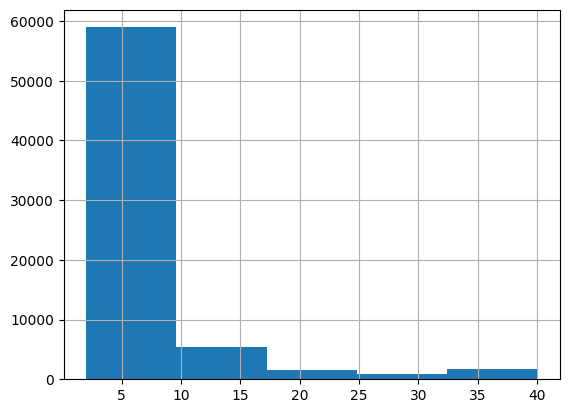

In [15]:
train_resmapled_dt['vote_replaced'].hist(bins=5)

In [16]:
print(pd.crosstab(train_resmapled_dt['vote_replaced'], train_resmapled_dt['overall'], normalize='columns') * 100)
print(pd.crosstab(train_resmapled_dt['vote_replaced'], train_resmapled_dt['overall'], normalize='index') * 100)
# print(pd.crosstab(train_resmapled_dt['vote_replaced'], train_resmapled_dt['overall'], normalize='all') * 100)


overall                1          2          3          4          5
vote_replaced                                                       
2.0            32.368421  38.211885  36.966221  36.523259  35.449004
3.0            18.780881  18.530253  19.542702  18.490472  18.415278
4.0            11.552095  11.042423  10.882728  10.585005  10.637952
5.0             7.846402   7.727378   7.074570   7.023384   6.655831
6.0             5.236305   4.852793   5.050988   5.142714   4.607883
7.0             4.017186   3.361409   3.537285   3.594907   3.559529
8.0             3.050483   2.635036   2.374124   2.629608   2.868753
9.0             2.282492   1.931845   2.095284   2.113672   1.958553
10.0            1.965628   1.715478   1.633206   1.730881   1.958553
11.0            1.493018   1.174561   1.362333   1.065158   1.397806
12.0            1.310419   0.950468   1.067559   1.281518   0.991467
13.0            0.988185   0.819102   0.804653   0.923691   0.837058
14.0            0.821697   0.79592

In [17]:
vote_cross_dt = pd.crosstab(train_resmapled_dt['vote_replaced'], train_resmapled_dt['overall'], normalize='index') * 100

In [18]:
vote_cross_dt.columns

Index([1, 2, 3, 4, 5], dtype='int64', name='overall')

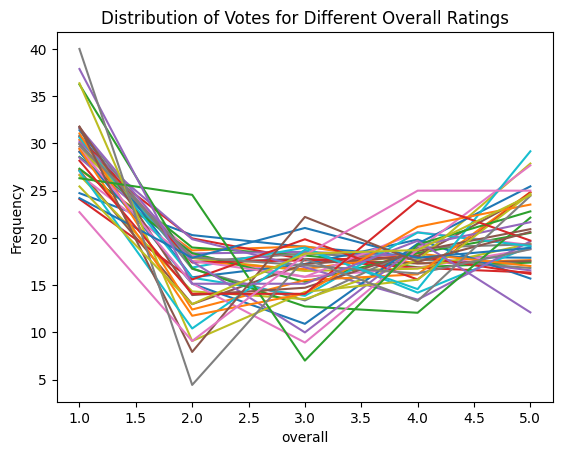

In [19]:
for i in vote_cross_dt.iloc:
    plt.plot([1, 2, 3, 4, 5], i)
plt.xlabel('overall')
plt.ylabel('Frequency')
plt.title('Distribution of Votes for Different Overall Ratings')
plt.show()

In [20]:
def clean_text(text):
    text = ' '.join(word for word in text.split() if not word.startswith(('http://', 'https://', 'www.')))
    # text = ''.join(char for char in text if not char.isdigit())
    # text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

In [21]:
train_resmapled_dt['reviewText_cleaned'] = train_resmapled_dt['reviewText'].apply(clean_text)

In [22]:
train_resmapled_dt

vote  verified  reviewTime      reviewerID        asin  \
717455  NaN      True  2017-12-11  A298U9IRGL21BX  B01GBOEQ6M   
433012  2.0      True  2016-11-05   AFRKM6MKAKLA6  B00W0RNTKO   
820441  NaN      True  2018-04-24  A1GPIKH97CVARL  B017KE9CIY   
432321  6.0      True  2017-07-03   AKJQ0A7DKGHZ0  B00VWJOK7M   
738402  NaN      True  2017-04-24   A7BC8ZKYDGGZN  B000EPJLGK   
...     ...       ...         ...             ...         ...   
732464  NaN      True  2017-12-29  A28EXN7GLCRMY4  B01HCVG51M   
383965  NaN      True  2018-04-25  A1ENFA99ERFUS1  B00RVH0WA8   
39189   NaN      True  2016-12-04  A2SFR2CCAMENPA  B000WAWSR6   
398964  NaN      True  2016-08-07  A2O6PK359XS4L0  B00T2K0ROI   
382051  NaN      True  2016-01-30  A2TYPLO6FMDAYK  B00RNGB6O8   

                                                    style     reviewerName  \
717455                                                NaN  Amazon Customer   
433012                        {'Size:': ' 4 Channel dvr'}       Anonymouse   
820441                {'Style:': " 8' Click Stand Black"}          bob1274   
432321            {'Color:': ' Black', 'Style:': ' Base'}         Parsifal   
738402           {'Package Type:': ' Standard Packaging'}  Star&#039;s Mom   
...                                                   ...              ...   
732464                            {'Style:': ' iSP6XWC4'}             glee   
383965                 {'Size:': ' 16-Pack AA + Charger'}         Matt 190   
39189                                {'Color:': ' Black'}              Ian   
398964                                                NaN               KP   
382051  {'Size:': ' BF-F9 V2+ Tri-Power', 'Color:': ' ...   Michael Minery   

                                               reviewText  \
717455  These are pretty cheap. The application isn't ...   
433012  Customer service is inadequate. The DVR came p...   
820441  This had a lot f promise but fails in almost e...   
432321  This expensive gadget is a lesson in engineers...   
738402  I had to send it back.  It wouldn't charge up,...   
...                                                   ...   
732464  Was easy to install and program.  Very user fr...   
383965  Completely, totally awesome product. Batteries...   
39189   I have been eyeing on this case for a while an...   
398964  Decently loud speaker that is great for singin...   
382051  Love this radio, works so good and built very ...   

                                                  summary  unixReviewTime  \
717455                             Cheap & Color Rubs off      1512950400   
433012            I would not recommend buying this brand      1478304000   
820441  This had a lot f promise but fails in almost e...      1524528000   
432321  If This Camera Is So Smart, Why Does My Mobile...      1499040000   
738402             Be careful who you purchase this from.      1492992000   
...                                                   ...             ...   
732464                Good smart plug and easy to set up.      1514505600   
383965  totally awesome product. Batteries come pre-ch...      1524614400   
39189       No doubt this will be super tough and durable      1480809600   
398964                                            Woo woo      1470528000   
382051                                         Five Stars      1454112000   

        overall  vote_replaced  \
717455        1            NaN   
433012        1            2.0   
820441        1            NaN   
432321        1            6.0   
738402        1            NaN   
...         ...            ...   
732464        5            NaN   
383965        5            NaN   
39189         5            NaN   
398964        5            NaN   
382051        5            NaN   

                                       reviewText_cleaned  
717455  these are pretty cheap. the application isn't ...  
433012  customer service is inadequate. the dvr came p...  
820441  this had a lot f promise but fails

In [23]:
X = train_resmapled_dt['reviewText_cleaned']
y = train_resmapled_dt['overall']

In [33]:
from keras.utils import to_categorical

y = to_categorical(y - 1)  

In [139]:
X

436622    owned 3 drop cam's in the past...had free clou...
27190     cyberpower has a terrible warranty policy!! bo...
279221    bought one tried for 4 hours to set it up haha...
714441    this pc was supposed to be refurbished. appare...
245889    this does not work with anytone radios. at lea...
                                ...                        
507458    i wanted a 32 gig memory stick that was metal ...
166872    what a happy surprise! these speakers are supe...
83558     very glad i got this. beautiful case with back...
256979    i've bought three of these do far. each is the...
645054    this work with different platform..i use it on...
Name: reviewText_cleaned, Length: 283780, dtype: object

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [117]:
# X_train_list = X_train.tolist()

In [36]:
X_train.dtype

dtype('O')

In [120]:
# X_train_filtered = [text for text in X_train if isinstance(text, str)]

In [37]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [169]:
len(tokenizer.word_counts)

125661

In [38]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [39]:
maxlen = 400
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)


In [40]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))  # لایه embedding
model.add(LSTM(units=128, return_sequences=False))  # لایه LSTM
model.add(Dense(5, activation='softmax'))  # خروجی با 5 کلاس و softmax برای طبقه‌بندی


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# نمایش ساختار مدل
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
checkpoint = ModelCheckpoint('best_weights.keras', monitor='val_accuracy', save_best_only=True, mode='max')

In [59]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test), callbacks=[checkpoint])


Epoch 1/10
  55/3548 ━━━━━━━━━━━━━━━━━━━━ 15:01 258ms/step - accuracy: 0.2015 - loss: 1.6123

KeyboardInterrupt: 

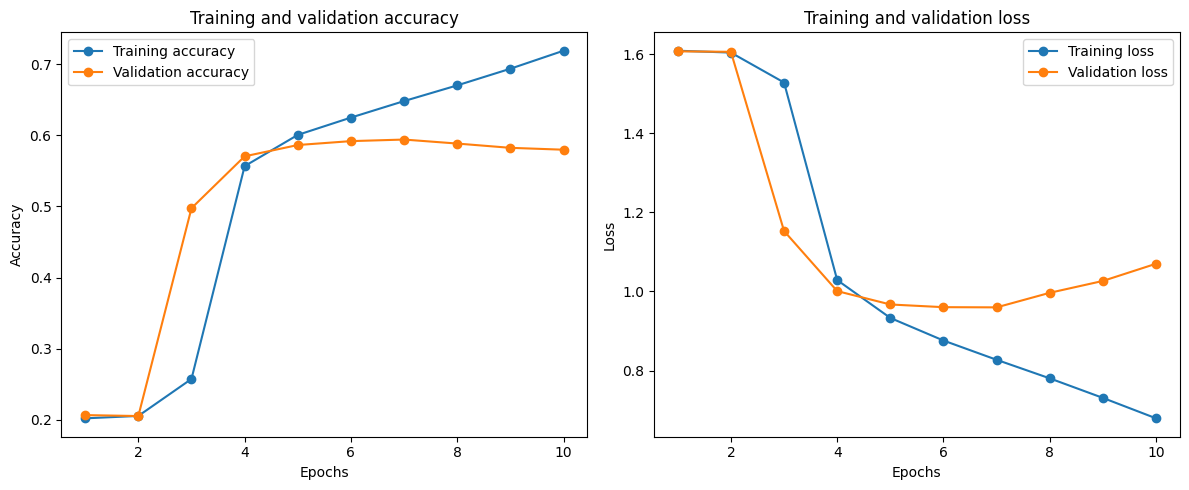

In [52]:

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# ترسیم نمودار دقت (Accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'o-', label='Training accuracy')
plt.plot(epochs, val_acc, 'o-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ترسیم نمودار زیان (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'o-', label='Training loss')
plt.plot(epochs, val_loss, 'o-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
import numpy as np

# بهترین دقت و زیان
best_val_acc = np.max(history.history['val_accuracy'])
best_val_loss = np.min(history.history['val_loss'])

# شناسایی ایپوک مربوطه
best_epoch_acc = np.argmax(history.history['val_accuracy']) + 1  # +1 به دلیل صفر بودن ایپوک‌ها
best_epoch_loss = np.argmin(history.history['val_loss']) + 1

print(f"Best Validation Accuracy: {best_val_acc} at epoch {best_epoch_acc}")
print(f"Best Validation Loss: {best_val_loss} at epoch {best_epoch_loss}")


Best Validation Accuracy: 0.5942103266716003 at epoch 7
Best Validation Loss: 0.9598366618156433 at epoch 7
